In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Parts of implementation take inspiration from Krish Naik's implementation found here https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb

# Import Data
Read data and look for null values within this data

In [247]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [248]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [249]:
train_data.info() #Cabin and age have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Show Training Data as a heat map where null values are highlighted for a better visualization of how dramatically these null values could affect the analysis

<AxesSubplot:>

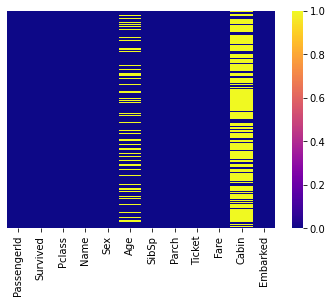

In [251]:
train_data.describe()
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=True,cmap="plasma")

In [252]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [254]:
feat_num = train_data[['Age','SibSp','Parch','Fare']]
feat_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

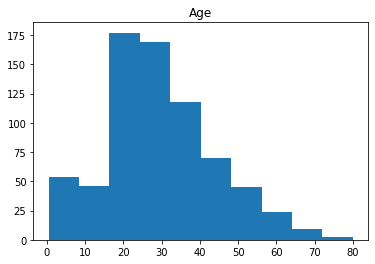

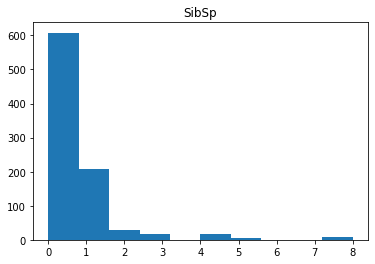

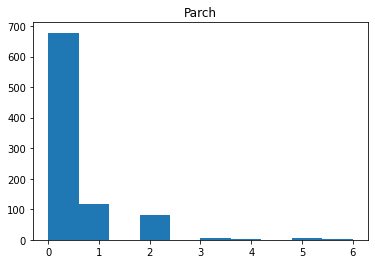

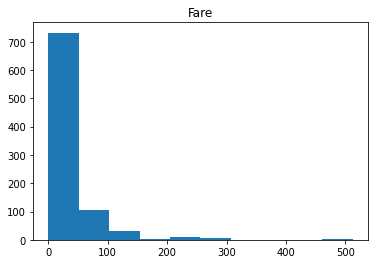

In [255]:
for i in feat_num:
    plt.hist(feat_num[i].dropna())
    plt.title(i)
    plt.show()

Age About normal, Rest would need to be normalized. Parch and Sibsp in fairly defined groups(Discrete). Would be better to treat these as categorical. Inherent order is present in both.

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

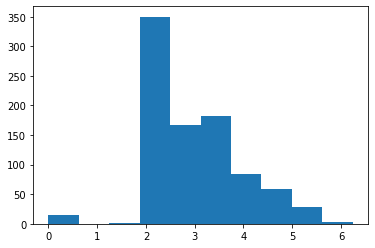

In [256]:
train_data['norm_fare'] = np.log(train_data.Fare+1)
test_data['norm_fare'] = np.log(test_data.Fare+1)
plt.hist(train_data["norm_fare"])

Normalized fare values for both training data and testing data

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

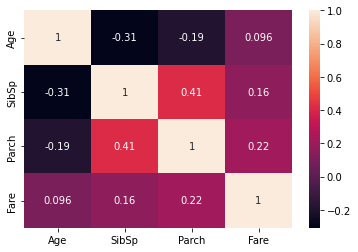

In [257]:
print(feat_num.corr())
sns.heatmap(feat_num.corr(), annot=True)

In [258]:
pd.pivot_table(train_data, index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


<AxesSubplot:xlabel='Survived', ylabel='count'>

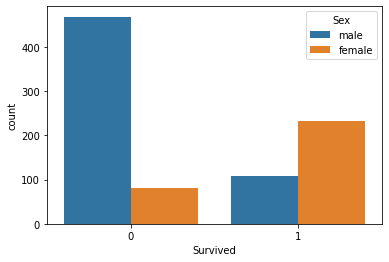

In [259]:
sns.countplot(x='Survived',hue='Sex',data=feat_cat)

Suggests that despite there being much more men on the ship, more women then men survived. Suggests a majority of the women on the ship survived while the vast majority of men did not

<AxesSubplot:xlabel='Pclass', ylabel='count'>

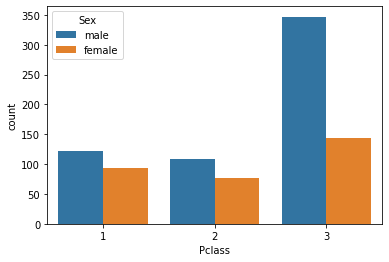

In [260]:
sns.countplot(x='Pclass',hue='Sex',data=feat_cat)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

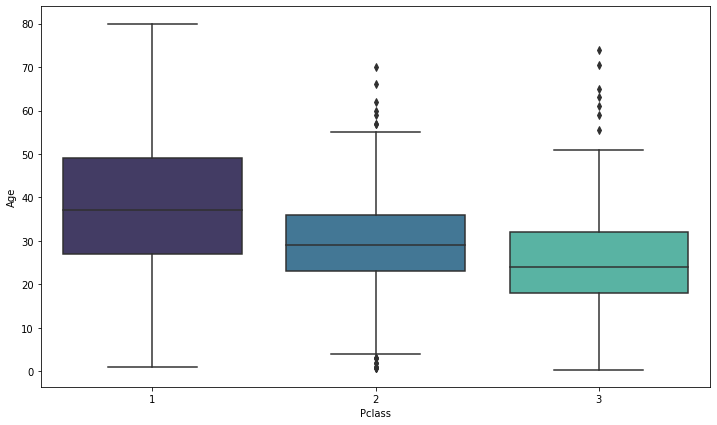

In [261]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train_data, palette="mako")

Relationship present between the class of each person and their age. The ages of those in 1st class tended to be older than those in 2nd class which tended to be older than 3rd class

In [262]:
def imput_age(df,PclasssNum):
    avg_age = df[df['Pclass']==PclasssNum]['Age'].mean()
    return avg_age

In [263]:
print(imput_age(train_data,1))
print(imput_age(train_data,2))
print(imput_age(train_data,3))

38.233440860215055
29.87763005780347
25.14061971830986


In [264]:
for i in range(1,4):
    train_data["Age"] = train_data["Age"].fillna(train_data[train_data["Pclass"]==i]['Age'].fillna(imput_age(train_data,i)))
    test_data["Age"]  = test_data["Age"].fillna(test_data[test_data["Pclass"]==i]["Age"].fillna(imput_age(test_data,i)))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  norm_fare    891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


Using the above boxplot, imputed the missing age values with the average age for each class of person

In [265]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  norm_fare    417 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


Idea to group multiple, less seen titles together was gotten from viewing Giorgos Karagiannis' Implementation, found here: https://www.kaggle.com/code/georgioskaragiannis/titanic-project-using-different-methods

In [266]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data['name_title'] = train_data['name_title'].replace(['Jonkheer','the Countess','Capt','Sir','Major','Don','Dona'],'Rare')
train_data['name_title'] = train_data['name_title'].replace(['Mlle','Mrs','Lady','Mme','Ms'],'Miss')
train_data['name_title'].value_counts()

Mr        517
Miss      312
Master     40
Rare        7
Dr          7
Rev         6
Col         2
Name: name_title, dtype: int64

In [267]:
train_data['cabin_level'] = train_data.Cabin.apply(lambda x: str(x)[0])
pd.pivot_table(train_data, index='Survived', columns='cabin_level', values='Name', aggfunc="count")

cabin_level,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [268]:
test_data['name_title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['name_title'] = test_data['name_title'].replace(['Jonkheer','the Countess','Capt','Sir','Major','Don','Dona'],'Rare')
test_data['name_title'] = test_data['name_title'].replace(['Mlle','Mrs','Lady','Mme','Ms'],'Miss')
test_data['name_title'].value_counts()

Mr        240
Miss      151
Master     21
Col         2
Rev         2
Dr          1
Rare        1
Name: name_title, dtype: int64

In [269]:
test_data['cabin_level'] = test_data.Cabin.apply(lambda x: str(x)[0])


<AxesSubplot:xlabel='cabin_level', ylabel='count'>

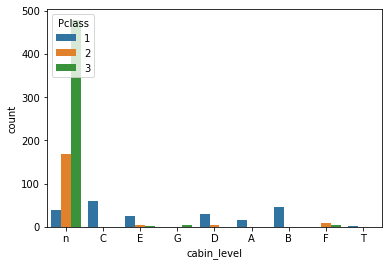

In [270]:
sns.countplot(x='cabin_level',hue='Pclass',data=train_data)

In [271]:
train_data['cabin_level']=train_data['cabin_level'].replace(['T'],'B')
test_data['cabin_level']=test_data['cabin_level'].replace(['T'],'B')

In [272]:
train_data.drop('Cabin',axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,norm_fare,name_title,cabin_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213,Mr,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593,Miss,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856,Miss,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834,Miss,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765,Mr,n


In [273]:
test_data.drop('Cabin',axis=1,inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,norm_fare,name_title,cabin_level
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2.178064,Mr,n
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2.079442,Miss,n
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,2.369075,Mr,n
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,2.268252,Mr,n
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2.586824,Miss,n


In [274]:
train_data.dropna(subset=["Embarked"], inplace = True)
test_data["Fare"]=test_data["Fare"].fillna(test_data["Fare"].mean())

train_data.info()
print('\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  norm_fare    889 non-null    float64
 12  name_title   889 non-null    object 
 13  cabin_level  889 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 104.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  -----

<AxesSubplot:>

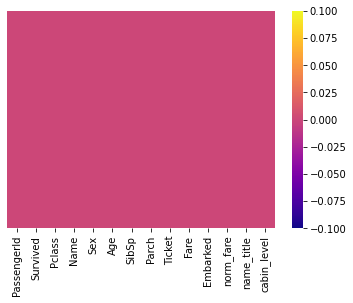

In [275]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=True,cmap="plasma")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

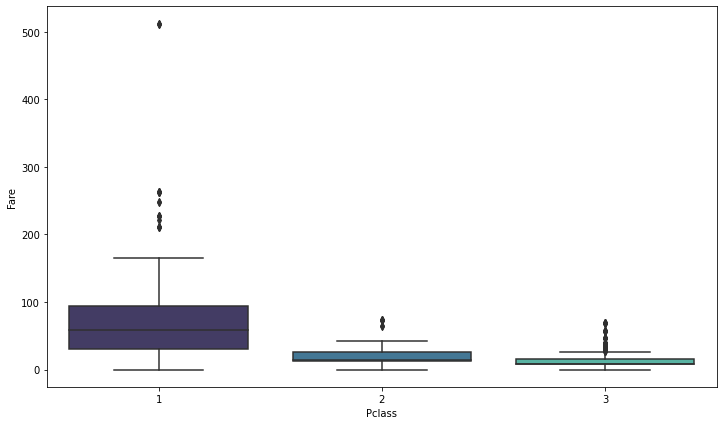

In [276]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare', data=train_data, palette="mako")

In [277]:
train_data.Pclass = train_data.Pclass.astype(str)
test_data.Pclass = train_data.Pclass.astype(str)
x_train = pd.get_dummies(train_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_level','name_title']])
y_train = train_data.Survived
x_test = pd.get_dummies(test_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_level','name_title']])
x_train.head()

,Age,SibSp,Parch,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,cabin_level_F,cabin_level_G,cabin_level_n,name_title_Col,name_title_Dr,name_title_Master,name_title_Miss,name_title_Mr,name_title_Rare,name_title_Rev
0,22.0,1,0,2.110213,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,38.0,1,0,4.280593,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,35.0,1,0,3.990834,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,35.0,0,0,2.202765,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [278]:
x_test.head()

,Age,SibSp,Parch,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,cabin_level_F,cabin_level_G,cabin_level_n,name_title_Col,name_title_Dr,name_title_Master,name_title_Miss,name_title_Mr,name_title_Rare,name_title_Rev
0,34.5,0,0,2.178064,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,47.0,1,0,2.079442,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,62.0,0,0,2.369075,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,27.0,0,0,2.268252,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,22.0,1,1,2.586824,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [279]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train, x_cv, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2, random_state=2023)
x_train_scaled = x_train.copy()
x_train_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(x_train_scaled[['Age','SibSp','Parch','norm_fare']])

x_test_scaled = x_test.copy()
x_test_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(x_test_scaled[['Age','SibSp','Parch','norm_fare']])



In [280]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [281]:
naiveb = GaussianNB()
naiveb.fit(x_train_scaled,y_train)
prediction = naiveb.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       119
           1       0.34      1.00      0.50        59

    accuracy                           0.35       178
   macro avg       0.67      0.51      0.28       178
weighted avg       0.78      0.35      0.20       178



In [282]:
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train_scaled,y_train)
prediction = lr.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       119
           1       1.00      0.10      0.18        59

    accuracy                           0.70       178
   macro avg       0.85      0.55      0.50       178
weighted avg       0.79      0.70      0.61       178



In [283]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(x_train_scaled,y_train)
prediction = dt.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.79      0.25      0.38       119
           1       0.36      0.86      0.51        59

    accuracy                           0.46       178
   macro avg       0.58      0.56      0.45       178
weighted avg       0.65      0.46      0.43       178



In [284]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
prediction = knn.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81       119
           1       0.83      0.08      0.15        59

    accuracy                           0.69       178
   macro avg       0.76      0.54      0.48       178
weighted avg       0.73      0.69      0.59       178



In [285]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train_scaled,y_train)
prediction = rf.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       119
           1       0.82      0.71      0.76        59

    accuracy                           0.85       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



In [286]:
svc = SVC(probability = True)
svc.fit(x_train_scaled,y_train)
prediction = svc.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       119
           1       1.00      0.10      0.18        59

    accuracy                           0.70       178
   macro avg       0.85      0.55      0.50       178
weighted avg       0.79      0.70      0.61       178



In [287]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)

In [288]:
xgb.fit(x_train_scaled,y_train)
prediction = xgb.predict(x_cv)
print(classification_report(y_cv,prediction))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       119
           1       0.77      0.75      0.76        59

    accuracy                           0.84       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178



In [289]:
predictions_XGB_final=xgb.predict(x_test_scaled)
print(predictions_XGB_final)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1]
